In [1]:
import glob,os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
plt.style.use('seaborn-colorblind')
import seaborn as sns
from scipy.stats import *
from functools import reduce

In [2]:
proj_dir=''
z=np.load(proj_dir+'neale/nl-degas_beta_p1e-6_500PCs_20201221.interactive.npz', allow_pickle=True)

In [3]:
print(z['U'].shape)
print(z['V'].shape)

(154008, 500)
(1013, 500)


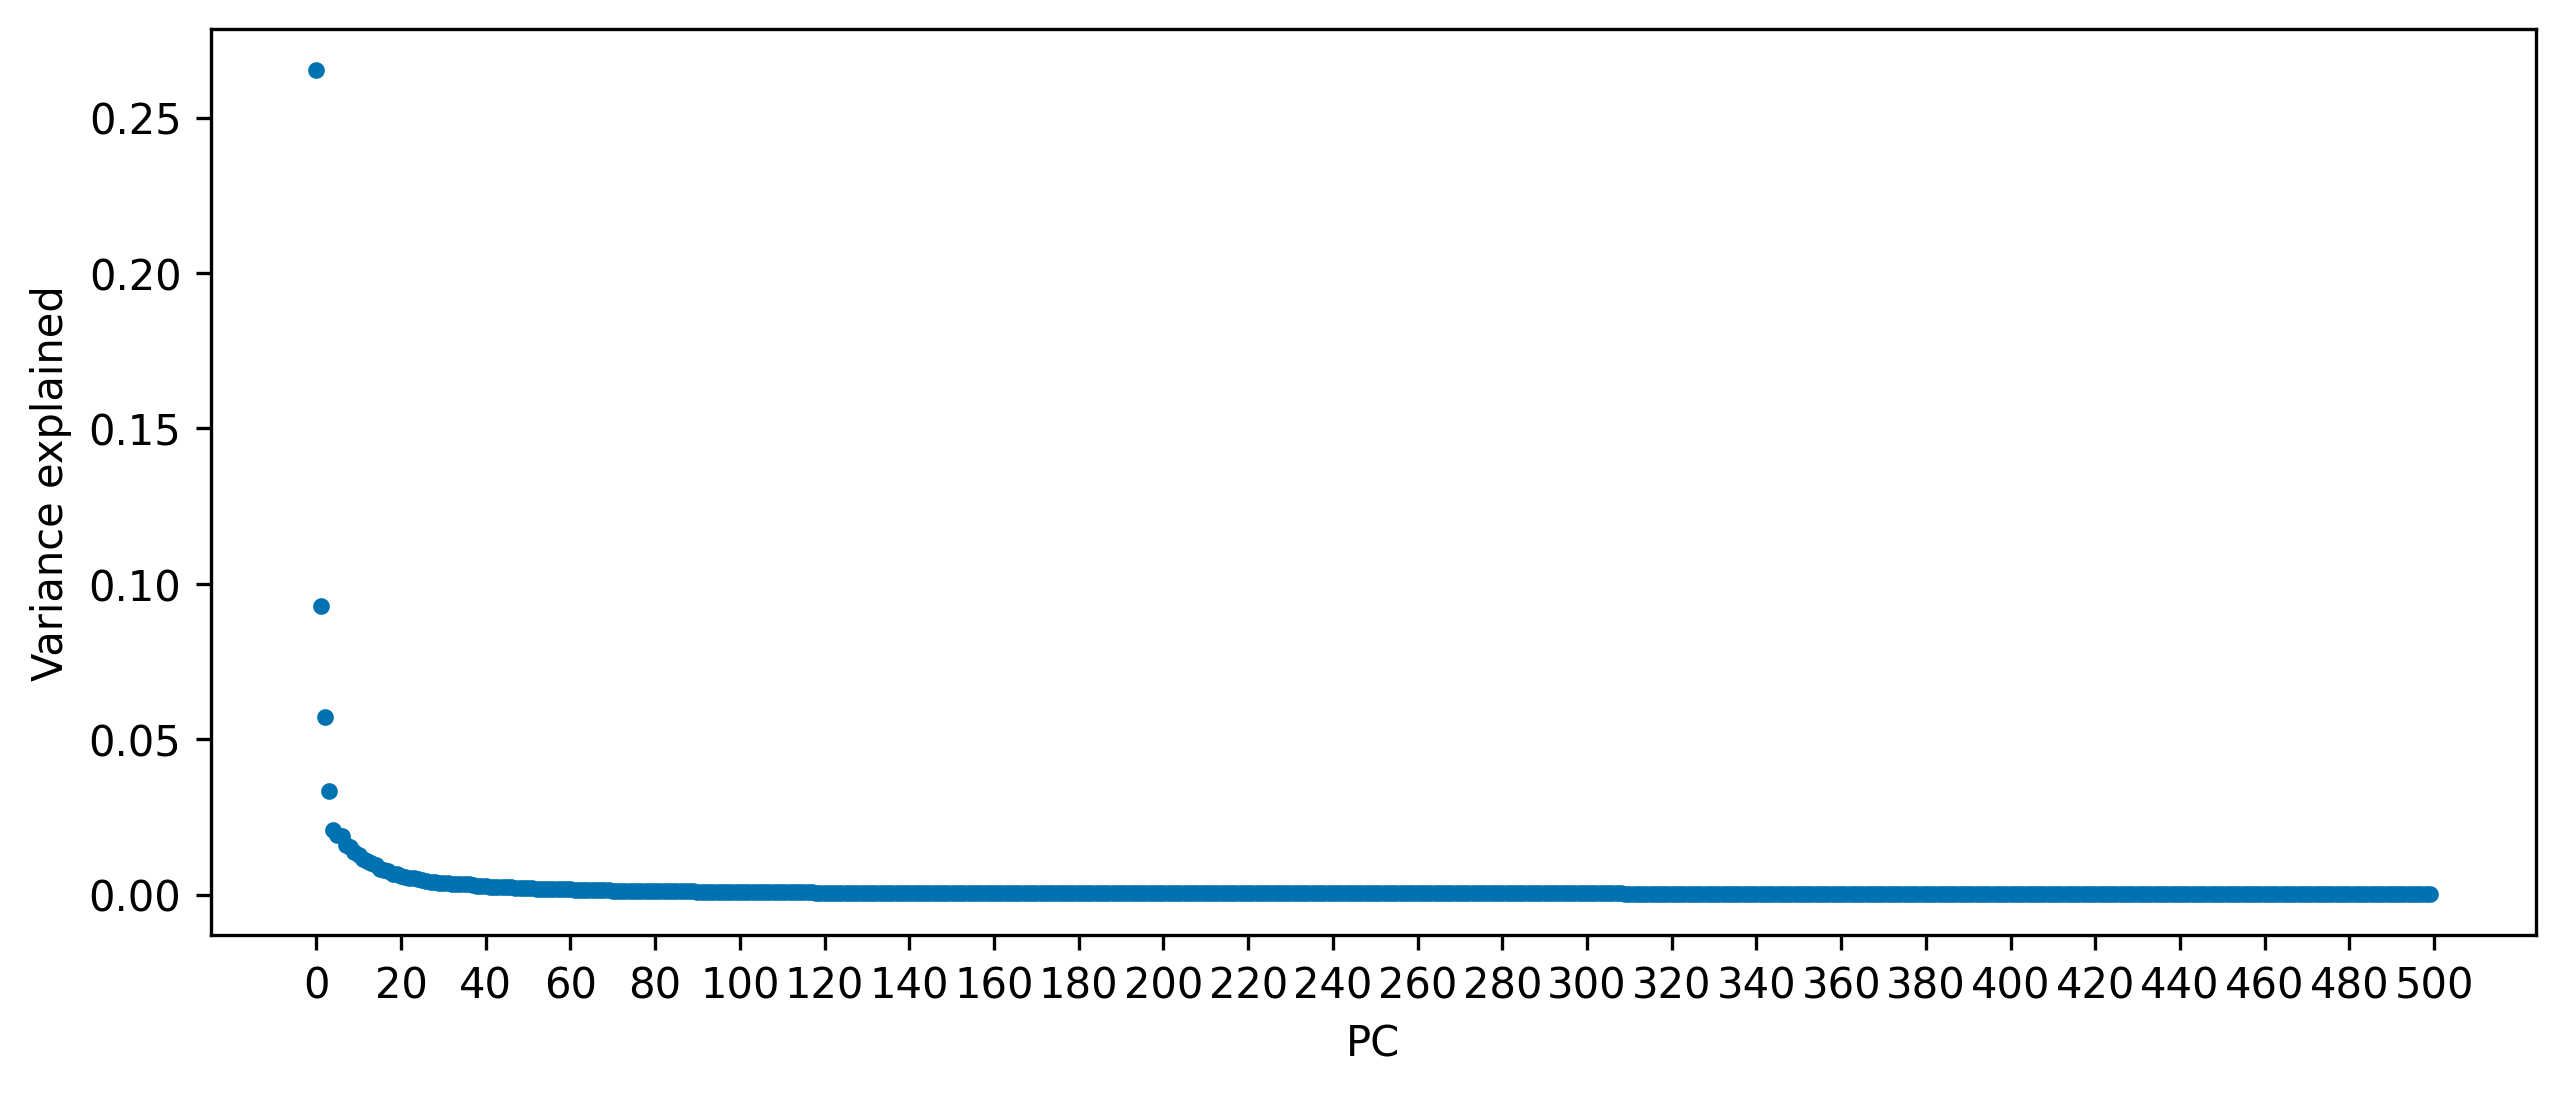

In [4]:
fig=plt.figure(figsize=(10,4),dpi=300)

# scree plot
ax=plt.subplot(111)
ax.plot(np.arange(z['D'].shape[0]), z['variance_explained_ratio'], '.')
ax.set_xticks(np.arange(0,z['D'].shape[0]+1,20))
ax.set_xlabel('PC')
ax.set_ylabel('Variance explained')

plt.show()

In [5]:
for pc in [10,25,50,100,250,500]:
    print("Top {0} PCs explain {1:.1f}% of input variance".format(pc, 
        100*z['variance_explained_ratio'][:pc].sum()))

Top 10 PCs explain 55.2% of input variance
Top 25 PCs explain 67.1% of input variance
Top 50 PCs explain 74.8% of input variance
Top 100 PCs explain 81.3% of input variance
Top 250 PCs explain 89.1% of input variance
Top 500 PCs explain 96.3% of input variance


In [6]:
code2phe=pd.read_table(proj_dir+'neale/phenos_include.tsv', header=None, index_col=0).iloc[:,0].to_dict()

PC1


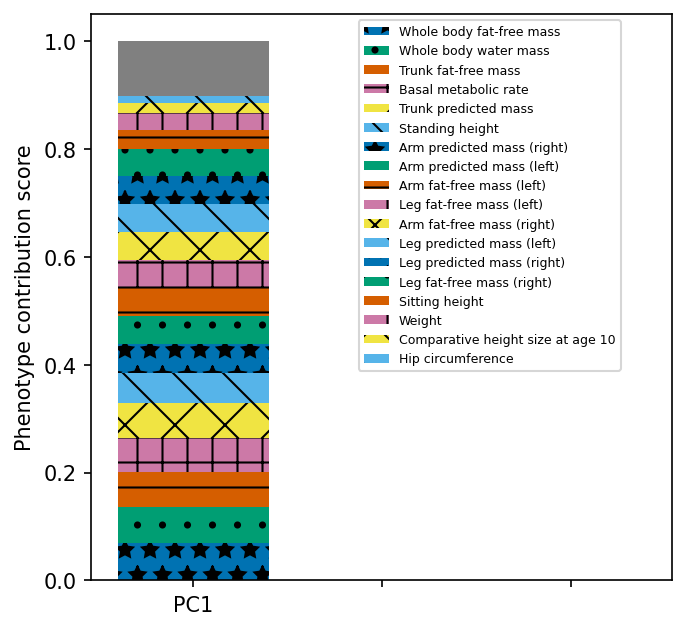

PC2


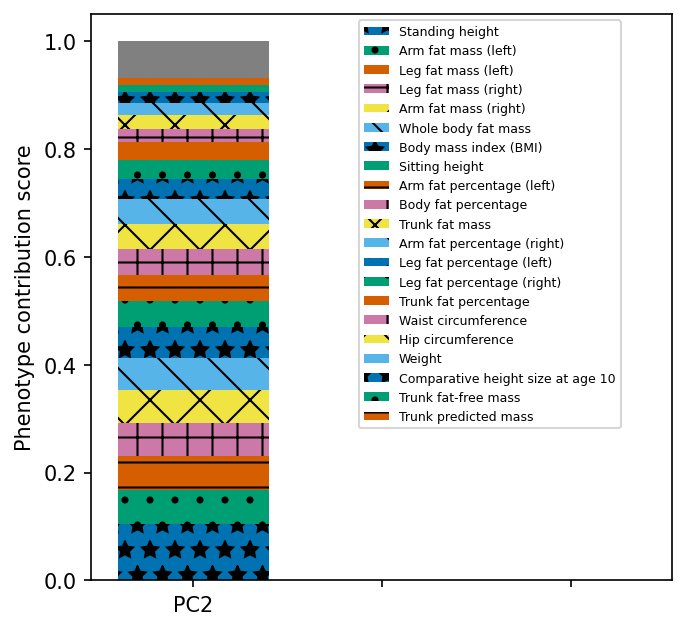

PC3


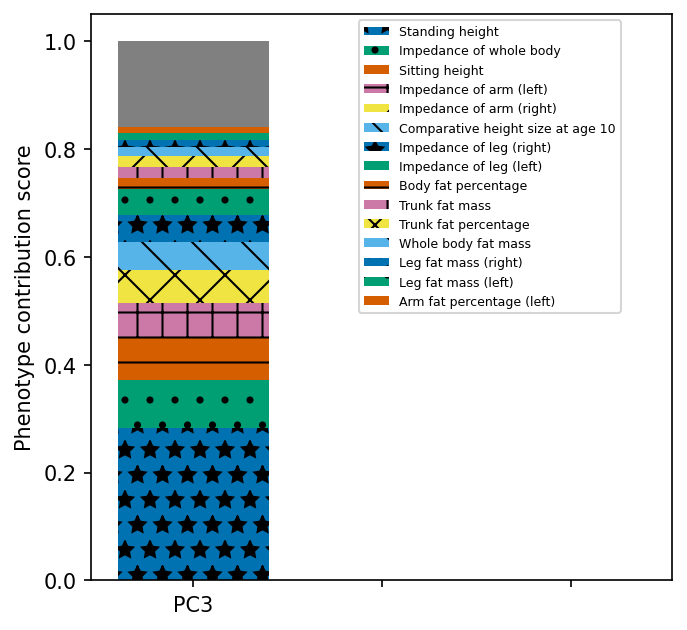

PC4


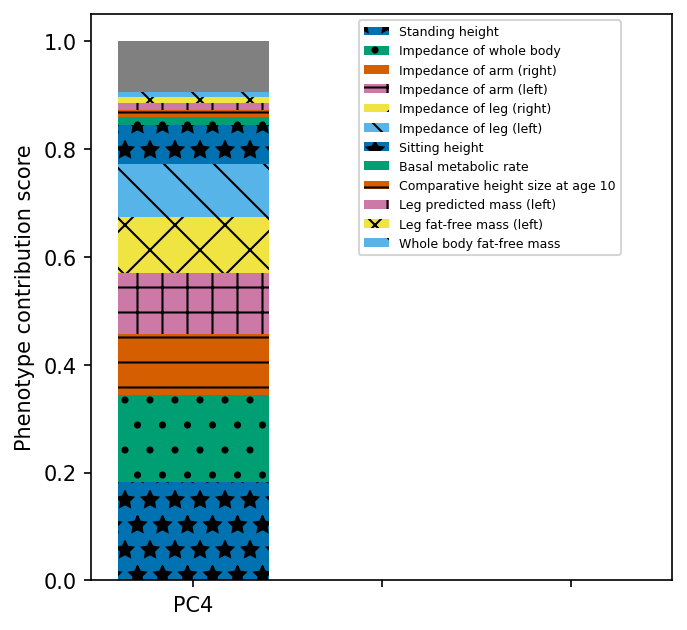

PC5


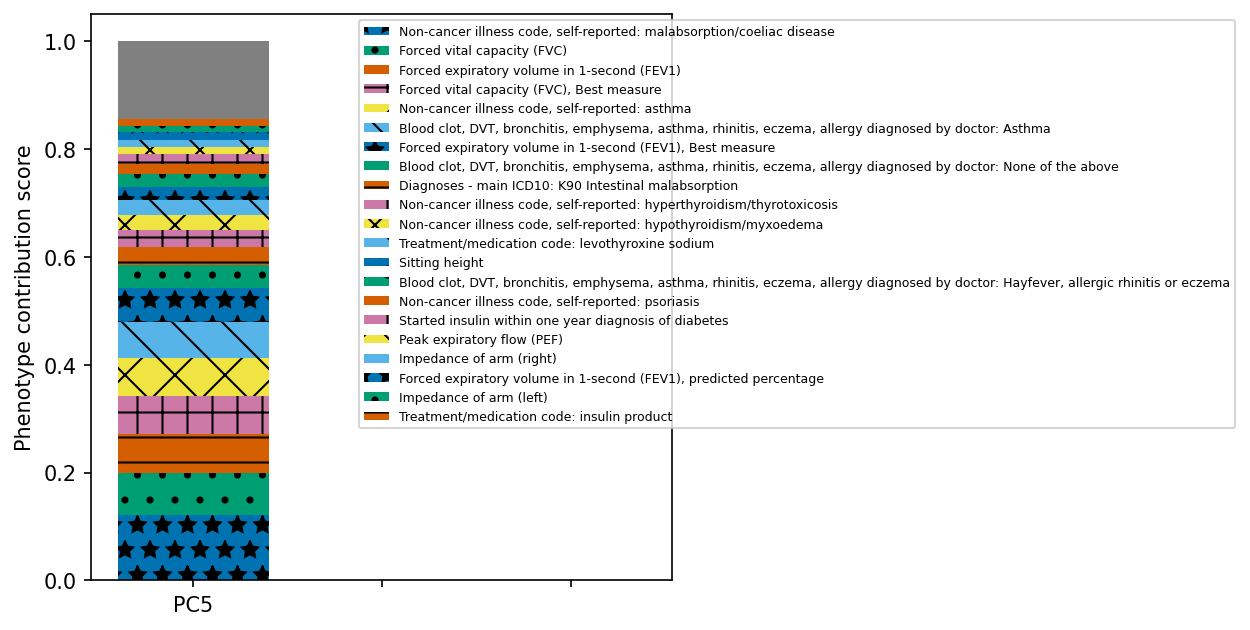

PC6
PC7
PC8
PC9
PC10
PC11
PC12
PC13
PC14
PC15
PC16
PC17
PC18
PC19
PC20
PC21
PC22
PC23
PC24
PC25
PC26
PC27
PC28
PC29
PC30
PC31
PC32
PC33
PC34
PC35
PC36
PC37
PC38
PC39
PC40
PC41
PC42
PC43
PC44
PC45
PC46
PC47
PC48
PC49
PC50
PC51
PC52
PC53
PC54
PC55
PC56
PC57
PC58
PC59
PC60
PC61
PC62
PC63
PC64
PC65
PC66
PC67
PC68
PC69
PC70
PC71
PC72
PC73
PC74
PC75
PC76
PC77
PC78
PC79
PC80
PC81
PC82
PC83
PC84
PC85
PC86
PC87
PC88
PC89
PC90
PC91
PC92
PC93
PC94
PC95
PC96
PC97
PC98
PC99
PC100
PC101
PC102
PC103
PC104
PC105
PC106
PC107
PC108
PC109
PC110
PC111
PC112
PC113
PC114
PC115
PC116
PC117
PC118
PC119
PC120
PC121
PC122
PC123
PC124
PC125
PC126
PC127
PC128
PC129
PC130
PC131
PC132
PC133
PC134
PC135
PC136
PC137
PC138
PC139
PC140
PC141
PC142
PC143
PC144
PC145
PC146
PC147
PC148
PC149
PC150
PC151
PC152
PC153
PC154
PC155
PC156
PC157
PC158
PC159
PC160
PC161
PC162
PC163
PC164
PC165
PC166
PC167
PC168
PC169
PC170
PC171
PC172
PC173
PC174
PC175
PC176
PC177
PC178
PC179
PC180
PC181
PC182
PC183
PC184
PC185
PC186
PC187
PC188


In [7]:
patterns = ('-', '+', 'x', '\\', '*', '.')
for pc in range(500):
    print('PC'+str(pc+1))
    plt.figure(figsize=(5,5), dpi=150)
    ranked_pcs=np.argsort(z['V'][:,pc]**2)[::-1]
    for ix,phe_ix in enumerate(ranked_pcs):
        if (z['V'][phe_ix,pc]**2)/np.sum(z['V'][:,pc]**2) > 0.01 and ix < 25:
            plt.bar(list(range(3)),
                    [(z['V'][phe_ix,pc]**2)/np.sum(z['V'][:,pc]**2),0,0], 
                    bottom=np.sum(z['V'][ranked_pcs[:ix],pc]**2),
                    label=code2phe[z['label_phe_code'][phe_ix]].replace('_',' '),
                    hatch=patterns[(ix + 4) % len(patterns) ]
                   )
        else:
            plt.bar(list(range(3)),
                    [1-(np.sum(z['V'][ranked_pcs[:ix],pc]**2)/np.sum(z['V'][:,pc]**2)),0,0],
                    bottom=np.sum(z['V'][ranked_pcs[:ix],pc]**2)/np.sum(z['V'][:,pc]**2), 
                    color='grey')
            plt.xticks(list(range(3)), ['PC{}'.format(pc+1),'',''])
            plt.ylabel('Phenotype contribution score')
            lgd=plt.legend(fontsize=6, loc='upper left', bbox_to_anchor=(0.45, 1))
            break
    plt.savefig('neale_pdfs/neale.phe_pc{}.pdf'.format(pc+1), bbox_extra_artists=(lgd,), bbox_inches='tight')
    if pc < 5:
        plt.show()
    else:
        plt.close()